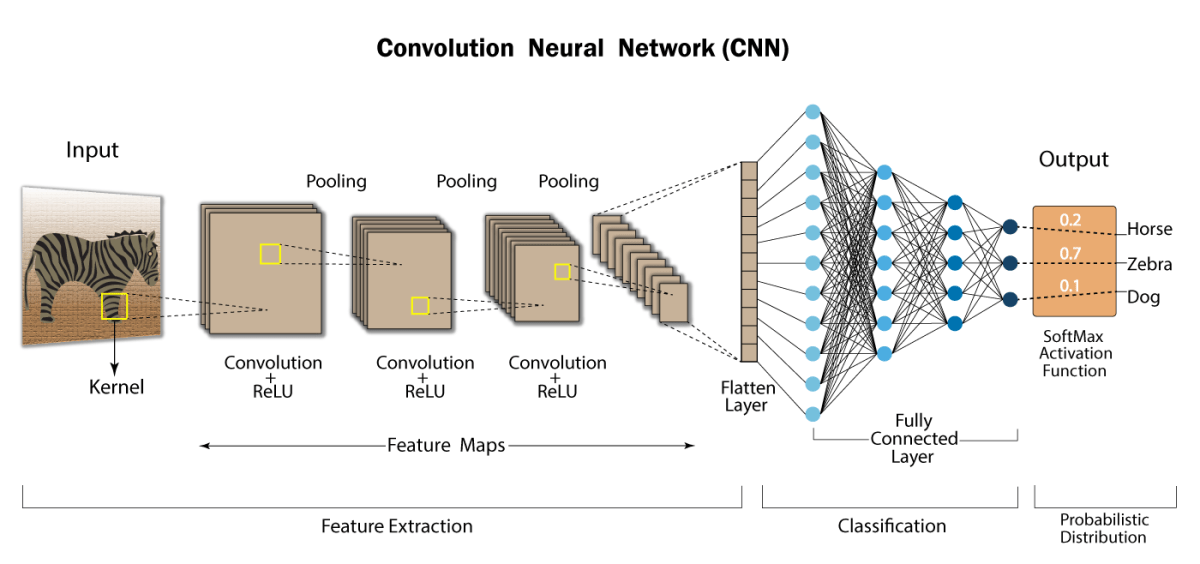

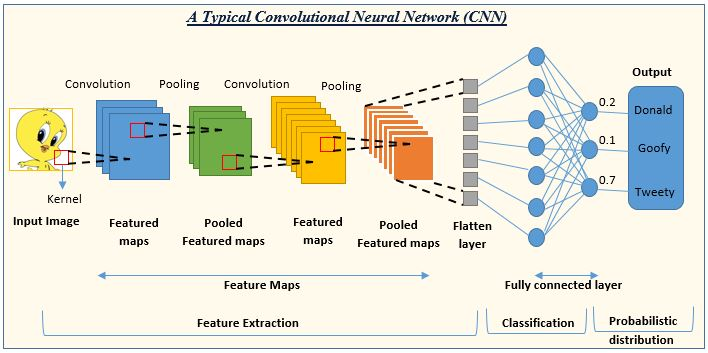

MNIST DATASET

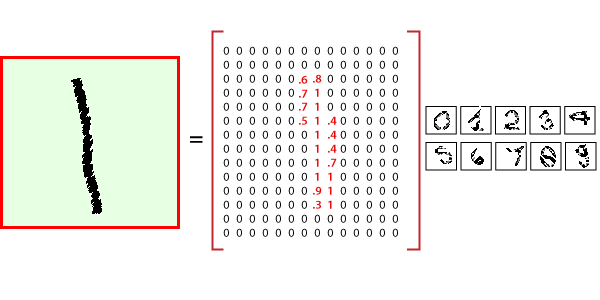

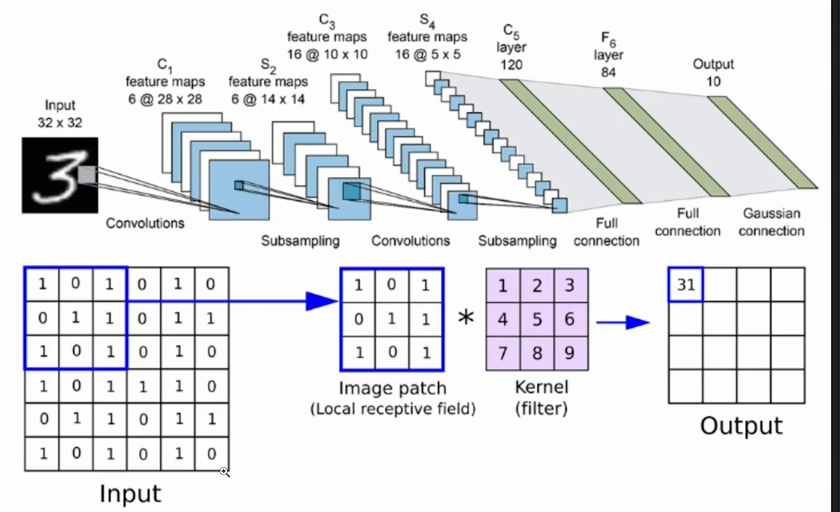

In a Convolutional Neural Network (CNN), the terms you mentioned—input image, input patch, kernel (also referred to as filter), and output—relate to the convolutional operation, which is a fundamental building block of CNNs. Let's break down each term:

1. **Input Image:**
   - The input image is the initial data fed into the CNN. It could be a grayscale image or a multi-channel (e.g., RGB) image. Each pixel in the image represents the intensity or color at a specific location. In the context of CNNs, images are often represented as multi-dimensional arrays.

2. **Input Patch (or Input Subregion):**
   - During the convolution operation, the input image is divided into smaller patches or subregions. These patches are the regions that the convolutional operation processes at each step. The size of these patches is determined by the receptive field of the convolutional layer.

3. **Kernel (or Filter):**
   - The kernel, also known as the filter, is a smaller-sized matrix that slides or convolves across the input image. The kernel's purpose is to detect certain patterns or features within the input data. In the context of image processing, kernels might capture features like edges, corners, or textures. The values in the kernel are learnable parameters that are adjusted during the training process.

4. **Convolution Operation:**
   - The convolution operation involves sliding the kernel over the input image, performing element-wise multiplication between the kernel values and the corresponding input patch values, and summing up the results. This produces a single value in the output feature map. The process is repeated across the entire input image, and the result is a new matrix called the output feature map.

5. **Output Feature Map:**
   - The output feature map is the result of the convolution operation. It represents the presence of specific features in the input image. Each element in the output feature map corresponds to a specific region in the input image and is influenced by the convolution operation applied to that region.

In summary, in the context of a CNN, the input image is divided into patches, and a convolution operation is applied using a kernel to detect features. This process is repeated across the entire image, producing an output feature map that captures relevant patterns and features. Convolutional layers in CNNs learn filters that can automatically extract hierarchical representations of features in the input data.

**IN ANN, the layers are fully connected, that is tough task in case of complex systems, containing lots of neurons. But in CNN, layers are locally connected, not fully connected. There are some filter layers, dropout layers as well in CNN.**

Certainly! Let's break down the key differences between Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs) in terms of connectivity, and introduce the concepts of filter layers and dropout layers in CNNs.

### Fully Connected Layers in ANN:

In a traditional Artificial Neural Network (ANN), each neuron in a layer is fully connected to every neuron in the next layer. This means that the weights associated with each connection are learned during training. The connectivity pattern forms a dense matrix, and as the number of neurons increases, the number of parameters grows rapidly, making it computationally expensive and challenging to train on large-scale datasets, especially for image data.

### Locally Connected Layers and Filter Layers in CNN:

Convolutional Neural Networks (CNNs) address the limitations of fully connected layers by introducing locally connected layers and filter layers:

1. **Locally Connected Layers:**
   - In CNNs, instead of every neuron being connected to every neuron in the next layer, neurons are connected to only a local region of the input. This local connectivity pattern is achieved using convolutional operations. Neurons in a convolutional layer are responsible for processing information in specific receptive fields or local patches of the input.

2. **Filter (Kernel) Layers:**
   - Filters (or kernels) are small-sized matrices that slide or convolve across the input data, performing element-wise multiplication and summing to produce a feature map. These filters capture different patterns or features in the input. For example, a filter might learn to detect edges, textures, or more complex structures. By sharing weights across the input, filters enable the network to learn translational invariance, making CNNs effective for tasks like image recognition.

### Dropout Layers in CNN:

In addition to locally connected layers and filter layers, CNNs often use dropout layers for regularization:

- **Dropout Layers:**
  - Dropout is a regularization technique used to prevent overfitting in neural networks. During training, randomly selected neurons are ignored (i.e., their outputs are set to zero) in each forward and backward pass. This helps prevent the network from relying too much on specific neurons and forces it to learn more robust features. Dropout layers are commonly applied after fully connected layers.

### Benefits of CNN Architecture:

1. **Parameter Sharing:**
   - CNNs leverage parameter sharing through shared weights in filters, reducing the number of learnable parameters and allowing the network to learn hierarchical features.

2. **Translation Invariance:**
   - Local connectivity and shared weights enable CNNs to be translation invariant, making them effective for tasks like image recognition, where the position of features in the input does not need to be precisely matched.

3. **Reduced Overfitting:**
   - Dropout layers provide a form of regularization, helping to prevent overfitting, especially when dealing with complex datasets.

In summary, CNNs are designed to handle complex systems, such as image data, by exploiting local connectivity patterns, using filter layers to capture features, and incorporating dropout layers for regularization. This architecture is well-suited for tasks involving spatial hierarchies and grid-like data structures, making CNNs particularly effective in computer vision applications.

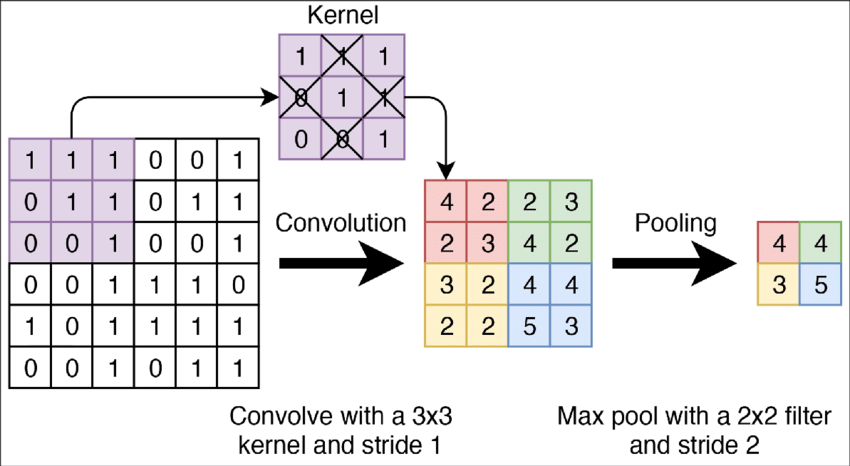

In [ ]:
# 6*6 to 4*4 to 2*2

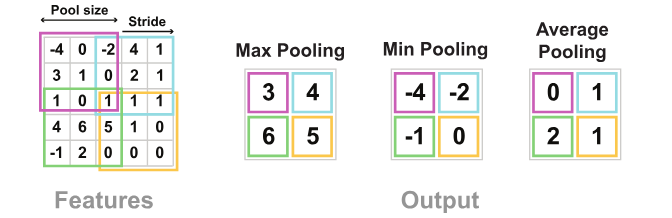

In [ ]:
import torch
# PyTorch is a deep learning library that provides tensor computation and automatic differentiation

import torch.nn as nn
# torch.nn provides a collection of modules and classes to define and train neural networks

import torch.nn.functional as F
# torch.nn.functional contains various activation functions and loss functions used in neural networks

from torch.utils.data import DataLoader
# torch.utils.data provides tools for loading and processing datasets in parallel

from torchvision import datasets, transforms
# torchvision is a package containing popular datasets, model architectures, and image transformations

from torchvision.utils import make_grid
# torchvision.utils provides utility functions for image processing, such as creating grids of images


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In summary:

- `torch`: The core PyTorch library for tensor computations and automatic differentiation.
- `torch.nn`: Provides modules and classes to define and train neural networks, including layers, loss functions, and optimization algorithms.
- `torch.nn.functional`: Contains functional operations commonly used in neural networks, such as activation functions and loss functions.
- `torch.utils.data`: Provides tools for loading and processing datasets, including the `DataLoader` class for parallel data loading.
- `torchvision`: A PyTorch package specifically for computer vision tasks, including datasets, model architectures, and image transformations.
- `torchvision.utils`: Utility functions in torchvision, such as `make_grid` for creating a grid of images.

These libraries collectively provide a powerful set of tools for working with neural networks, computer vision tasks, and data loading in PyTorch.

In [ ]:
#Convert image files into tensors of 4-Dimensions
tramsforn = transforms.ToTensor() # transform ko tramsform likha hai taki name samjhne me easy rhe

In [ ]:
# Train data, taking from datasets modeule
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform = tramsforn)

100%|██████████| 9912422/9912422 [00:00<00:00, 118649096.47it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70756830.50it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25625137.17it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8512300.61it/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



Certainly! Let's break down the code:

```python
# Convert image files into tensors of 4-Dimensions
transform = transforms.ToTensor()  # Transform to convert images to PyTorch tensors

# Train data, taken from the datasets module
train_data = datasets.MNIST(
    root='cnn_data',               # Root directory where the dataset will be stored
    train=True,                    # Set to True for the training set
    download=True,                 # Downloads the dataset if not found locally
    transform=transform            # Applies the specified transform to the data (converts images to tensors in this case)
)
```

Explanation:

1. **`transforms.ToTensor()`:**
   - `transforms.ToTensor()` is a transformation provided by PyTorch's `transforms` module. It converts images (PIL Image or numpy array) to PyTorch tensors. The pixel values are scaled to the range [0, 1] during this conversion.

2. **`transform = transforms.ToTensor()`:**
   - The transformation is assigned to the variable `transform` for ease of use.

3. **`datasets.MNIST()`:**
   - The `datasets.MNIST` class from torchvision is used to load the MNIST dataset.

4. **Parameters of `datasets.MNIST()`:**
   - `root='cnn_data'`: Specifies the root directory where the dataset will be stored. If the dataset is not found locally, it will be downloaded to this directory.
   
   - `train=True`: Indicates that the training set is being loaded.

   - `download=True`: Downloads the MNIST dataset from the internet if it's not found locally.

   - `transform=transform`: Applies the specified transform to the data. In this case, it converts images to PyTorch tensors using the `ToTensor` transformation.

Now, `train_data` is an object that holds the training set of the MNIST dataset, and each image in the dataset is represented as a 3D tensor (for grayscale images) or a 4D tensor (for color images) depending on the number of channels. The tensor will have dimensions `(C, H, W)` or `(B, C, H, W)` where `C` is the number of channels (1 for grayscale, 3 for RGB), `H` is the height, `W` is the width, and `B` is the batch size (number of images). The actual tensor shape depends on the specific image size and whether the dataset is grayscale or color.

In [ ]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=tramsforn)

It looks like there's a small typo in the `root` parameter. It should be `'cnn_data'` instead of `'/cnn_data'`. Here's the corrected version:

```python
# Test Data
test_data = datasets.MNIST(
    root='cnn_data',               # Root directory where the dataset will be stored
    train=False,                   # Set to False for the test set
    download=True,                 # Downloads the dataset if not found locally
    transform=transform            # Applies the specified transform to the data (converts images to tensors in this case)
)
```

In this code snippet, `test_data` is similar to `train_data` but is configured for the test set of the MNIST dataset. It uses the same transformations (`transform=transform`) to convert the images in the test set into PyTorch tensors.

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
cd ../

/


In [ ]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/   libx32@                   opt/         run/   tmp/
boot/      datalab/                    lib@    media/                    proc/        sbin@  tools/
cnn_data/  dev/                        lib32@  mnt/                      python-apt/  srv/   usr/
content/   etc/                        lib64@  NGC-DL-CONTAINER-LICENSE  root/        sys/   var/


In [ ]:
cd cnn_data

/cnn_data


In [ ]:
ls

MNIST/


In [ ]:
cd MNIST

/cnn_data/MNIST


In [ ]:
ls

raw/


In [ ]:
cd raw

/cnn_data/MNIST/raw


In [ ]:
ls

t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz   train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz


In [ ]:
cd

/root


In [ ]:
ls

In [ ]:
pwd

'/root'

In [ ]:
cd ../

/


In [ ]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/   libx32@                   opt/         run/   tmp/
boot/      datalab/                    lib@    media/                    proc/        sbin@  tools/
cnn_data/  dev/                        lib32@  mnt/                      python-apt/  srv/   usr/
content/   etc/                        lib64@  NGC-DL-CONTAINER-LICENSE  root/        sys/   var/


In [ ]:
cd content/

/content


In [ ]:
ls

sample_data/


In [ ]:
pwd

'/content'

So get to know ki where the content gets saved

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

total 60000 training datasets and 10000 tesing datasets = total 70000 images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

# Convolutional and Pooling layers

In [ ]:
#  Create a small batch size for images .. let say 10
train_loader = DataLoader(train_data,batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

Your code is creating data loaders for the training and test sets with a batch size of 10 and enabling shuffling of the data. Here's the explanation:

```python
# Create a small batch size for images, let's say 10
train_loader = DataLoader(
    train_data,                  # Training dataset
    batch_size=10,               # Number of samples in each batch
    shuffle=True                 # Shuffle the data at the beginning of each epoch
)

test_loader = DataLoader(
    test_data,                   # Test dataset
    batch_size=10,               # Number of samples in each batch
    shuffle=True                 # Shuffle the data at the beginning of each epoch
)
```

Explanation:

1. **`DataLoader` (for Training):**
   - `train_loader` is a PyTorch `DataLoader` for the training dataset (`train_data`).
   - `batch_size=10`: Specifies that each batch will contain 10 samples.
   - `shuffle=True`: Shuffles the training data at the beginning of each epoch. Shuffling is beneficial during training to avoid learning patterns based on the order of the data.

2. **`DataLoader` (for Testing):**
   - `test_loader` is a PyTorch `DataLoader` for the test dataset (`test_data`).
   - `batch_size=10`: Specifies that each batch will contain 10 samples.
   - `shuffle=True`: Shuffles the test data at the beginning of each epoch. Shuffling can be useful during testing to ensure that the model's performance is evaluated on a diverse set of examples.

These data loaders are used during the training and testing phases to iterate through the datasets in batches. The specified batch size of 10 means that the model will process 10 images at a time during each training or testing iteration. Shuffling the data helps in introducing randomness during training, making the model more robust.

**Ye batch size kya hai? I am not understanding its use**

The batch size is a hyperparameter that defines the **number of samples to work through before updating the internal model parameters.** In the context of training a neural network, **it's the number of training examples utilized in one iteration.**

Here's a brief explanation of the batch size and its use:

1. **Batch Size:**
   - The batch size is a crucial parameter in training neural networks. It determines the number of training examples utilized in one iteration. The entire training dataset is divided into batches, and the model's parameters are updated after processing each batch.

2. **Advantages of Batch Processing:**
   - **Computational Efficiency:** Processing the entire dataset at once might not fit into the memory of the machine. Batching allows the model to be trained on subsets of the data, making it computationally feasible.

   - **Regularization:** Training on batches introduces noise into the optimization process, acting as a form of regularization. The model generalizes better to unseen data when it encounters variations within each batch.

   - **Convergence Speed:** Training with larger batches may speed up the convergence of the model during optimization.

3. **Effect on Memory and Computation:**
   - **Memory:** Smaller batch sizes consume less memory, which is beneficial when working with limited GPU memory.

   - **Parallelism:** Larger batch sizes can lead to parallelism in GPU processing, which can be exploited for faster training.

4. **Choosing the Right Batch Size:**
   - The choice of batch size depends on factors such as the size of the dataset, available memory, and computational resources.

   - Smaller batch sizes are common, especially when working with limited resources, but they might result in more noisy updates.

   - Larger batch sizes may provide a smoother optimization process but require more memory.

In the provided code, `batch_size=10` means that the model will process 10 training examples at a time during each iteration of the training process. It's a balance between computational efficiency, regularization effects, and memory requirements. Adjusting the batch size is often part of the hyperparameter tuning process in training neural networks.

**Behind the scene of CNN, let's understand just by one image.** THIS IS NOT ORIGINAL MODEL CODE, JUST UNDERSTANDING KE LIYE HAI, AFTER THAT SBKUCH MERGE KRKE ACTUAL MODEL BANAYENGE.

In [ ]:
#  Create a small batch size for images .. let say 10
train_loader = DataLoader(train_data,batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

In [ ]:
# Define our CNN Model FOR UNDERSTANDING ONLY, ACTUAL MODEL BAD ME AAYEGA

# Describe convolutional layer and what it is doing(2 convolutional layers)

# tHIS IS JUST AN EXAMPLE, LATER WE SHALL BUILD OUT THE ACTUAL MODEL

conv1 = nn.Conv2d(1, 6, 3, 1)  # (in features, out features, kernal size = 3*3, stride = 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [ ]:
# Grab 1 MNIST record/image
for i, (x_Train, y_Train) in enumerate(train_data):
  break  # ek data load hote hi break the loop.

In [ ]:
x_Train.shape # ek tensor image 28*28 size(pixels) ki

torch.Size([1, 28, 28])

In [ ]:
# YE EK 2d IMAGE HAI, LET'S CONVERT IT TO 4d BATCH
x = x_Train.view(1,1,28,28) # batch of 1 image, 1 channel, 28*28 size of the image

In [ ]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified linear unit for our activation function)

In [ ]:
x.shape # 1,6,28,28 --> 1,6,26,26

torch.Size([1, 6, 26, 26])

1 = 1 single image, 6 is the output features we asked for,

mnist dataset me all 4 edges ke pas kuch nhi hai, only black hai. Also we didn't define any padding. So in this particular case padding is off. So outdoor couple of pixels is getting dropped as there is not any data/info there at the edges. So 28\*28 pixels is getting shrinked to 26\*26 pixels.

Certainly, let's break down the code and comments:

```python
# Create a small batch size for images, let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

# Define our CNN Model FOR UNDERSTANDING ONLY, ACTUAL MODEL BAD ME AAYEGA

# Describe convolutional layer and what it is doing (2 convolutional layers)

# THIS IS JUST AN EXAMPLE, LATER WE SHALL BUILD OUT THE ACTUAL MODEL

# Define two convolutional layers
conv1 = nn.Conv2d(1, 6, 3, 1)  # (in channels, out channels, kernel size = 3*3, stride = 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

# Grab 1 MNIST record/image
for i, (x_Train, y_Train) in enumerate(train_data):
    break  # Stop the loop after loading one data record

# x_Train.shape: A single image with dimensions 28*28 pixels
x_Train.shape

# Convert the 2D image to a 4D batch
x = x_Train.view(1, 1, 28, 28)  # 1 batch, 1 channel (grayscale), 28*28 size of the image

# Perform the first convolution
x = F.relu(conv1(x))  # Apply the ReLU activation function after the convolution

# x.shape: (1, 6, 28, 28) --> 1 batch, 6 output channels, 28*28 size of the output
x.shape
```

Explanation:

1. **Data Loaders:**
   - `train_loader` and `test_loader` are PyTorch `DataLoader` objects created to handle batches of training and test data. The specified batch size is 10, meaning each iteration of training or testing will process 10 images at a time.

2. **Convolutional Layers:**
   - `conv1` and `conv2` are two convolutional layers. `nn.Conv2d` is used to define a 2D convolutional layer in PyTorch. The parameters include the number of input channels (`in_channels`), the number of output channels (`out_channels`), kernel size (`kernel_size`), and stride (`stride`).

3. **Processing a Single Image:**
   - A single image from the training data (`x_Train`) is loaded. It has dimensions of 28*28 pixels.

4. **Reshaping for Convolution:**
   - `x_Train.view(1, 1, 28, 28)` reshapes the 2D image into a 4D tensor. The first dimension represents the batch size (1), the second dimension represents the number of channels (1 for grayscale), and the last two dimensions represent the height and width of the image.

5. **Applying the First Convolution:**
   - `F.relu(conv1(x))` performs the first convolution operation using `conv1` and applies the Rectified Linear Unit (ReLU) activation function. This produces an output tensor with dimensions `(1, 6, 28, 28)`. The number of channels increases from 1 to 6 after the convolution.

Now, regarding the comment about shrinking from 28\*28 to 26\*26 pixels:

- **Padding Explanation:**
  - In this specific case, since padding is not explicitly defined (`padding=0` by default), the convolution operation does not add any padding to the input image. When a convolutional kernel slides over the input image, the edges lose a few pixels because the kernel cannot extend beyond the image boundaries. This "shrinking" from 28\*28 to 26\*26 occurs due to the absence of padding. If padding were added, the output dimensions could be preserved.

I hope this clarifies the code and comments for you!

**Confused in kernel , padding and stride**

Certainly! Let's break down the concepts of padding, stride, and kernels in the context of convolutional neural networks (CNNs) with examples.

### 1. **Padding:**
   - **Definition:** Padding involves adding extra pixels around the input image to prevent information loss at the edges during convolution.
   - **Example:**
     - Suppose you have a 3x3 input image:  
       ```
       [1, 2, 3]
       [4, 5, 6]
       [7, 8, 9]
       ```
     - Without padding, if you apply a 2x2 kernel, the output size will be reduced to 2x2:
       ```
       [5, 7]
       [8, 9]
       ```
     - With padding, if you add a border of 1 pixel, the input becomes:
       ```
       [0, 0, 0, 0, 0]
       [0, 1, 2, 3, 0]
       [0, 4, 5, 6, 0]
       [0, 7, 8, 9, 0]
       [0, 0, 0, 0, 0]
       ```
     - Now, with the same 2x2 kernel, the output size remains 3x3, preserving more information.

### 2. **Stride:**
   - **Definition:** Stride is the step size with which the convolutional kernel moves across the input image.
   - **Example:**
     - Using the 3x3 input with a 2x2 kernel:
       ```
       [1, 2, 3]
       [4, 5, 6]
       [7, 8, 9]
       ```
     - Without padding and with a stride of 1, the output is:
       ```
       [5, 7]
       [8, 9]
       ```
     - With a stride of 2, the output becomes:
       ```
       [5]
       ```
     - The larger the stride, the more the kernel "skips" pixels, reducing the output size.

### 3. **Kernel (Filter):**
   - **Definition:** The kernel is a small matrix that is convolved with the input to extract features.
   - **Example:**
     - Suppose you have a 3x3 kernel:
       ```
       [a, b, c]
       [d, e, f]
       [g, h, i]
       ```
     - The convolution operation involves element-wise multiplication with the input region, and the sum of the products becomes a single value in the output feature map.

### Putting It All Together:
   - **Example with Padding, Stride, and Kernel:**
     - Input Image:
       ```
       [1, 2, 3]
       [4, 5, 6]
       [7, 8, 9]
       ```
     - Applying a 2x2 kernel with no padding and a stride of 1:
       ```
       [5, 7]
       [8, 9]
       ```
     - Applying a 2x2 kernel with padding and a stride of 1:
       ```
       [5, 7]
       [8, 9]
       ```
     - Applying a 2x2 kernel with no padding and a stride of 2:
       ```
       [5]
       ```

In summary, padding, stride, and kernels are parameters that affect how the convolution operation processes the input image and produces the output feature map. Padding helps preserve information at the edges, stride controls the step size of the convolution, and the kernel extracts features from local regions of the input. Adjusting these parameters can impact the spatial dimensions of the output feature map.

**one more doubt**


**conv1 = nn.Conv2d(1, 6, 3, 1)  # (in channels, out channels, kernel size = 3*3, stride = 1)**

**conv2 = nn.Conv2d(6, 16, 3, 1)**


**here what actually the first convolutional layer is doing ki 1 input imgae se 6 out features are being created. What are these 6 features**

In the context of convolutional neural networks (CNNs), each convolutional layer learns to extract certain features from the input data. Let's break down the parameters of the first convolutional layer:

```python
conv1 = nn.Conv2d(1, 6, 3, 1)
```

- `1` is the number of input channels. For grayscale images, it's typically 1 because there's only one channel (intensity).

- `6` is the number of output channels or filters. Each filter in the convolutional layer learns to detect different features in the input. ( 6 filters/kernals here = 6 different features will be detected in the innput channel, 1 by each filter)

- `3` is the size of the convolutional kernel. It's a 3x3 filter (matrix) that slides across the input image to extract local patterns.

- `1` is the stride, which specifies the step size of the kernel as it moves across the input image.

So, what are these 6 features? Each of the 6 filters in `conv1` learns to recognize different patterns or features in the input image. These could be edges, textures, or more complex structures depending on the training data. The parameters of the filters (the weights and biases) are learned during the training process.

After applying `conv1` to an input image, you get an output tensor with 6 channels, where each channel represents the presence or absence of a specific feature detected by the corresponding filter. These channels collectively form the output feature map or the input of 2nd convolutional layer, if if exists

In essence, the convolutional layers are feature extractors. The deeper layers in the network tend to learn more complex and abstract features based on the patterns detected in the earlier layers. This hierarchical feature learning is a key aspect of CNNs and helps them capture hierarchical representations of the input data.

In [ ]:
# pass through the pooling layer after convolution layer

x = F.max_pool2d(x,2,2) # kernel = 2, stride =2

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

1,6 same. but 26 se 13 ho gya as 26/2 = 13 since pooling in kernal of 2*2

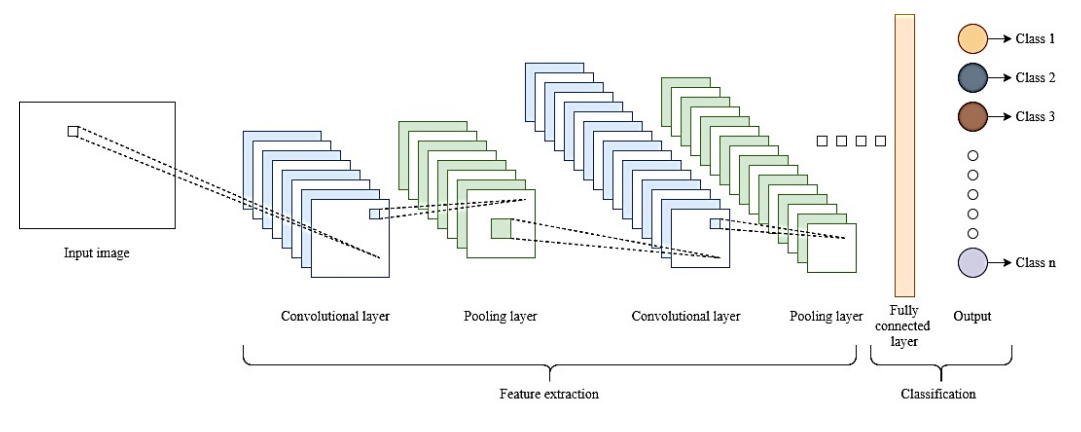

In our example, For each of the 6 output channels,  1 , 1 pooling channels for each output channel. so 1st convolution layer ka output(6 channels) -> pooling process -> Vahi sare 6 channels but they are pooled now, mtlb each 2*2 distict boxes se max element is pooled or selected and rest are ignored.

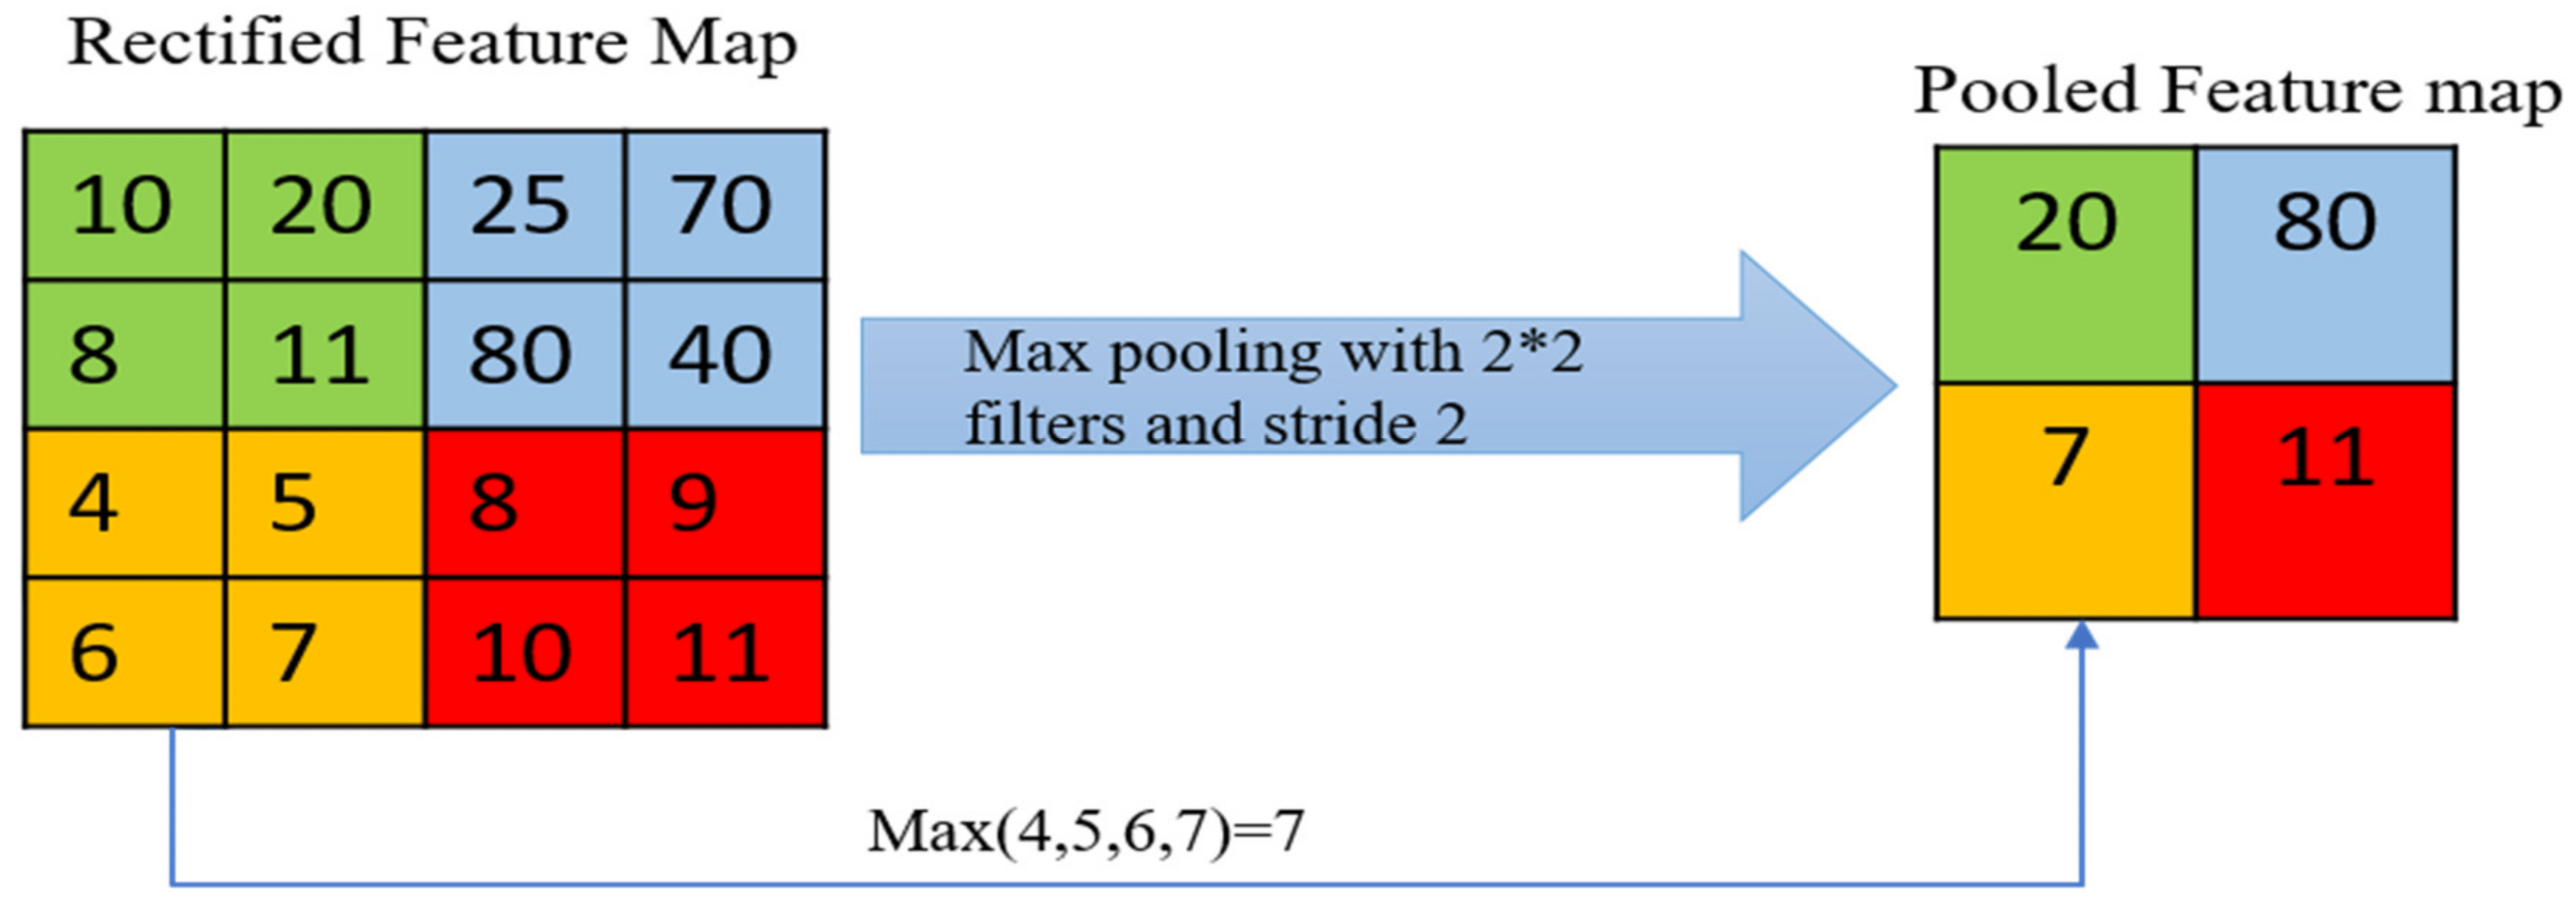

This is demonstartion of only one output channel of first conv2d layer. Baki 5 ke bhi ese hi hue honge just imagine.

**pooling kyon important hai**

Yes, you're correct. Pooling layers in a Convolutional Neural Network (CNN) play a role in reducing the spatial dimensions of the input data, thereby decreasing the complexity of the model. Pooling achieves this reduction through downsampling, retaining essential information while discarding some of the less relevant details. Here's how pooling contributes to reducing complexity:

1. **Spatial Reduction:**
   - Pooling, particularly max pooling or average pooling, reduces the spatial dimensions of each feature map. This downsampling is usually done by taking the maximum (max pooling) or average (average pooling) value within a local region.

2. **Translation Invariance:**
   - Pooling introduces a level of translation invariance. The exact location of a feature becomes less important, as pooling retains the most salient information within local regions. This makes the model less sensitive to small variations in the input.

3. **Reduction in Parameters:**
   - Fewer parameters are required in subsequent layers of the network. By reducing the size of the feature maps, pooling reduces the number of parameters in fully connected layers or subsequent convolutional layers, leading to a more computationally efficient model.

4. **Increased Receptive Field:**
   - As pooling reduces spatial dimensions, each unit in the feature map represents a larger region in the input. This increased receptive field allows the network to capture more abstract and high-level information.

5. **Computationally Efficient:**
   - Pooling reduces the amount of computation needed in subsequent layers. The downsampling means that subsequent layers operate on smaller representations, which can be computationally more efficient.

While pooling helps reduce complexity, it's important to note that excessive pooling or aggressive downsampling can lead to loss of information. Striking the right balance between downsampling for efficiency and maintaining essential information is a key consideration in designing effective CNN architectures.

In [ ]:
# Do our second convolutional layer. : input image -> 1st convolutional layer -> 1st pooling layer -> 2nd convolutional layer ->  2nd pooling layer.

x = F.relu(conv2(x)) # here 6 in features and 16 out features

In [ ]:
x.shape # again no padding ke karan, around the outside region, we lost some pixels.

torch.Size([1, 16, 11, 11])

In [ ]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [ ]:
x.shape  # this is final length of tensor/image

torch.Size([1, 16, 5, 5])

11/2 = 5.5 , so we have to round down because we cannot invent data to round up. 5.5 Ke upar ki image we already have deleted. We don't have some image to round up. Hence round down krna pda

((28-2)/2  - 2) / 2 =5.5

divide by 2, is because of pooling and -2 is because of having no padding in convolution layer.

Now the below image is clear, ki kaise 1 image se 1st con2d layer dvara 3 output features bn rhe, fir un 3 output features/channels ke pooling output ko 2nd convolution layer me pass kr rhe hain, and 2nd convolution layer se total 16(man lo) output features/channels bn rhe hai jinke pooling output to finally fully connected ann layers me pass kiya ja rha hai to determine weights and biases.

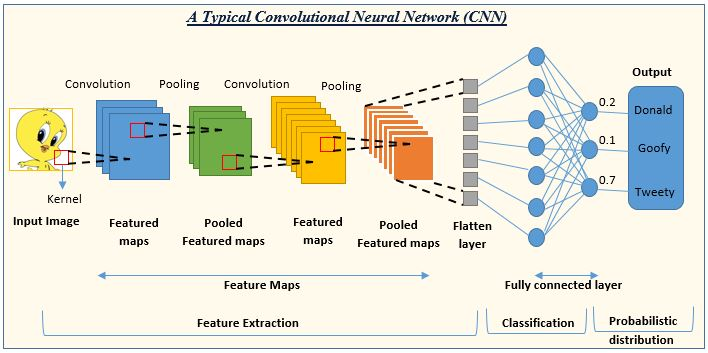

Now deep dive hone ke bad, let's see how the actual model will look like. But mja aa gya upar .

In [ ]:
# Model Class : taking the above code and putting into object oriented formate.
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully Connected Layer
    self.fc1 = nn.Linear(5*5*16, 120) # 5*5*16 is conv2d ke output ka flattened form hai
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X): # pushing thing forward , both def has to be lined up
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2

    # Re-View to flatten it out
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
# create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) # smaller the learning rate, longer its gonns take to return.
# by default Gradient Descent jaisa kam apne aap pytorch me ho jata hai. Tensorflow jaisa explicitly mention nhi krna pdta hai

Yes, the last comment is approximately correct. In PyTorch, the `torch.optim` module provides a collection of optimization algorithms, and the `torch.optim.Adam` optimizer is a variant of gradient descent that adapts the learning rates of individual parameters. When you use the `torch.optim.Adam` optimizer, you don't have to explicitly mention the learning rate for each parameter; the optimizer takes care of it.

Here's a breakdown:

1. **`torch.optim` Module:**
   - PyTorch's `torch.optim` module provides various optimization algorithms commonly used for training neural networks. These algorithms include stochastic gradient descent (SGD), Adam, Adagrad, RMSprop, etc.

2. **`torch.optim.Adam`:**
   - The `torch.optim.Adam` optimizer is a popular choice because it adapts the learning rates for each parameter individually. It combines ideas from both momentum optimization and RMSprop. The algorithm adjusts the learning rates based on the historical gradients, allowing for faster convergence.

3. **Setting the Learning Rate:**
   - When you create an instance of the `torch.optim.Adam` optimizer, as in your example:
     ```python
     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
     ```
     - `model.parameters()` provides the parameters (weights and biases) of your neural network model to the optimizer.
     - `lr=0.001` sets the initial learning rate for the optimizer.

4. **Adaptive Learning Rates:**
   - Unlike traditional gradient descent where a fixed learning rate is used for all parameters, Adam adjusts the learning rates based on the historical gradients. This adaptive approach can be beneficial, especially in scenarios with sparse gradients or varying scales of the parameters.

5. **Default Values:**
   - If you don't specify the learning rate explicitly, the `torch.optim.Adam` optimizer uses a default learning rate of 0.001.

So, while you still have to set an initial learning rate, the adaptive nature of Adam helps alleviate the need for meticulous tuning of learning rates for each parameter, as compared to traditional gradient descent.

**TRAINING AND TESTING OUR CNN MODEL**

In [ ]:
import time  # just to keep track how long it takes for training
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0 # train_correct
  tst_corr = 0 # test_correct


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
    trn_corr += batch_corr # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time # it is in seconds
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.1623610556125641
Epoch: 0  Batch: 1200  Loss: 0.1502392590045929
Epoch: 0  Batch: 1800  Loss: 0.4744560718536377
Epoch: 0  Batch: 2400  Loss: 0.14238706231117249
Epoch: 0  Batch: 3000  Loss: 0.007758188061416149
Epoch: 0  Batch: 3600  Loss: 0.3836284875869751
Epoch: 0  Batch: 4200  Loss: 0.0038223876617848873
Epoch: 0  Batch: 4800  Loss: 0.0021286322735249996
Epoch: 0  Batch: 5400  Loss: 0.0569545142352581
Epoch: 0  Batch: 6000  Loss: 0.00038789428072050214
Epoch: 1  Batch: 600  Loss: 0.02950388565659523
Epoch: 1  Batch: 1200  Loss: 0.01223783753812313
Epoch: 1  Batch: 1800  Loss: 0.0017079260433092713
Epoch: 1  Batch: 2400  Loss: 0.004794587381184101
Epoch: 1  Batch: 3000  Loss: 0.00012589071411639452
Epoch: 1  Batch: 3600  Loss: 0.006774441804736853
Epoch: 1  Batch: 4200  Loss: 0.00024002441205084324
Epoch: 1  Batch: 4800  Loss: 0.011869433335959911
Epoch: 1  Batch: 5400  Loss: 0.0003403539885766804
Epoch: 1  Batch: 6000  Loss: 0.0003896451380569488
Epoc

Certainly! Let's break down the provided code piece by piece:

```python
import time  # just to keep track how long it takes for training
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []
```

- **Import Libraries and Initialize Variables:**
  - Import the `time` library to keep track of the training time.
  - `start_time` is set to the current time to mark the beginning of training.
  - Variables like `epochs`, `train_losses`, `test_losses`, `train_correct`, and `test_correct` are initialized to keep track of various metrics during training.

```python
# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0  # train_correct
  tst_corr = 0  # test_correct

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1  # start our batches at 1
    y_pred = model(X_train)  # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train)  # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1]  # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum()  # how many we got correct from this batch. True = 1, False = 0, sum those up
    trn_corr += batch_corr  # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b % 600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)
```

- **Training Loop:**
  - The outer loop runs for the specified number of `epochs`.
  - `trn_corr` and `tst_corr` are initialized to zero for tracking correct predictions during training and testing, respectively.
  - The inner loop (`for b, (X_train, y_train) in enumerate(train_loader)`) iterates over batches in the training data.
  - `model(X_train)` computes the predicted values using the neural network model.
  - `criterion(y_pred, y_train)` calculates the loss by comparing predictions to the actual targets.
  - `torch.max(y_pred.data, 1)[1]` extracts the predicted class labels.
  - `batch_corr` counts the number of correct predictions in the current batch.
  - Training parameters are updated using gradient descent (`optimizer.zero_grad()`, `loss.backward()`, `optimizer.step()`).
  - If the batch index (`b`) is a multiple of 600, print the epoch, batch, and loss for monitoring.
  - Append the final loss and correct predictions to the respective lists.

```python
  # Test
  with torch.no_grad():  # No gradient so we don't update our weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]  # Adding up correct predictions
      tst_corr += (predicted == y_test).sum()  # T=1 F=0 and sum away

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)
```

- **Testing Loop:**
  - After each epoch, a testing loop is performed using the `test_loader`.
  - `torch.no_grad()` ensures that no gradients are calculated during testing since we don't need to update parameters.
  - Similar to the training loop, correct predictions (`tst_corr`) are counted.

```python
current_time = time.time()
total = current_time - start_time  # it is in seconds
print(f'Training Took: {total/60} minutes!')
```

- **Print Training Time:**
  - Calculate the total training time and print it in minutes.

In summary, this code performs training and testing for a specified number of epochs, keeping track of losses and correct predictions. The training loop iterates through batches, computes predictions, calculates losses, and updates the model parameters. The testing loop evaluates the model's performance on the test dataset. The overall training time is then printed.

**For loop ke andar 3 line training and 3 line testing ke case me jo tough hain, unko aur detail me smjhna**

Certainly! Let's break down those lines of code in more detail:

### Training Code:

```python
predicted = torch.max(y_pred.data, 1)[1]  # add up the number of correct predictions. Indexed off the first point
```

- `torch.max(y_pred.data, 1)` finds the maximum value along dimension 1 (across columns) in the `y_pred` tensor.
- `[1]` extracts the indices (positions) of the maximum values, representing the predicted class labels.
- So, `predicted` now contains the predicted class labels for each example in the batch.

```python
batch_corr = (predicted == y_train).sum()  # how many we got correct from this batch. True = 1, False=0, sum those up
```

- `(predicted == y_train)` creates a boolean tensor where each element is `True` if the prediction matches the true label (`y_train`) and `False` otherwise.
- `.sum()` then counts the number of `True` values, which gives the number of correct predictions in the batch.
- `batch_corr` now holds the count of correct predictions in the current batch.

```python
trn_corr += batch_corr  # keep track as we go along in training.
```

- `trn_corr` is a running total of correct predictions across all batches. `trn_corr += batch_corr` updates this total with the correct predictions from the current batch.

### Testing Code:

```python
predicted = torch.max(y_val.data, 1)[1]  # Adding up correct predictions
```

- Similar to the training code, this line extracts the predicted class labels (`predicted`) from the output tensor `y_val` for each example in the test batch.

```python
tst_corr += (predicted == y_test).sum()  # T=1 F=0 and sum away
```

- `(predicted == y_test)` creates a boolean tensor indicating whether the predictions match the true labels in the test set.
- `.sum()` counts the number of correct predictions in the batch.
- `tst_corr` is a running total of correct predictions across all batches in the test set. `tst_corr += (predicted == y_test).sum()` updates this total with the correct predictions from the current batch.

In summary, these lines are calculating and accumulating the number of correct predictions during both training and testing phases, which is crucial for evaluating the performance of the model.

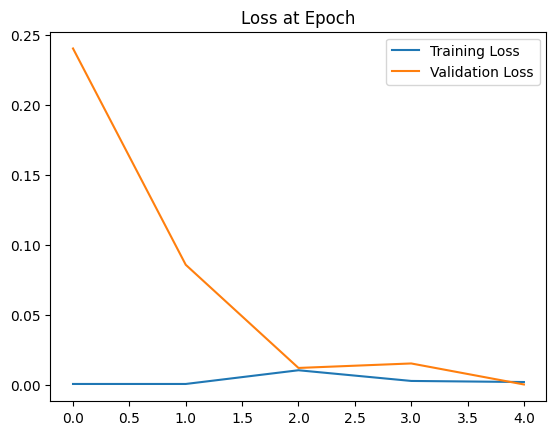

In [ ]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

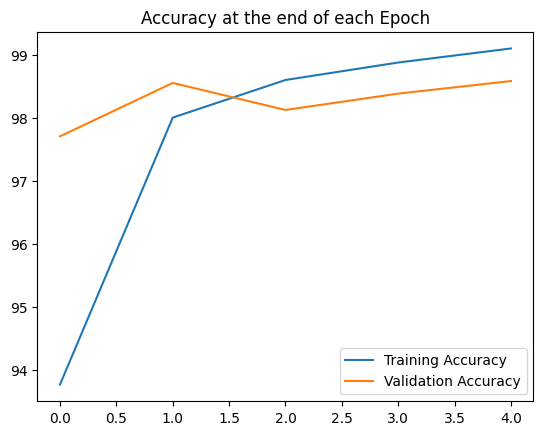

In [ ]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

Good accuracy : 98%

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [ ]:
# Did for correct
correct.item()/len(test_data)*100

98.59

Certainly! Here's a brief explanation of the provided code:

```python
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)
```
- `test_load_everything` is a data loader for the entire test dataset (`test_data`), loading it in a single batch of size 10,000. This is done to evaluate the model on the entire test set at once.

```python
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()
```
- The `torch.no_grad()` context manager is used to disable gradient computation during inference, reducing memory usage and speeding up the process.
- The loop iterates over batches of the entire test dataset.
- `model(X_test)` computes predictions (`y_val`) for the current batch.
- `torch.max(y_val, 1)[1]` extracts the predicted class labels.
- `(predicted == y_test).sum()` calculates the number of correct predictions in the batch, and `correct` is updated accordingly.

```python
correct.item()/len(test_data)*100
```
- `correct.item()` retrieves the total number of correct predictions.
- `len(test_data)` gives the total number of examples in the test set.
- `(correct.item()/len(test_data))*100` calculates the accuracy by dividing the number of correct predictions by the total number of examples and multiplying by 100 to get the percentage accuracy.

In summary, this code evaluates the trained model on the entire test dataset, calculates the number of correct predictions, and reports the accuracy as a percentage. The use of `torch.no_grad()` is important during evaluation to prevent unnecessary gradient computations.

# Send new image through our cnn

In [54]:
# Grab an image
test_data[1978] # Tensor with an image in it...at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [55]:
# Grab just the data , oh smjha, text_data[image_number][data of imgae, accessed by 0][label of image, accessed by 1] , is tarah se data hai.
test_data[1978][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [56]:
# Reshape it
test_data[1978][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

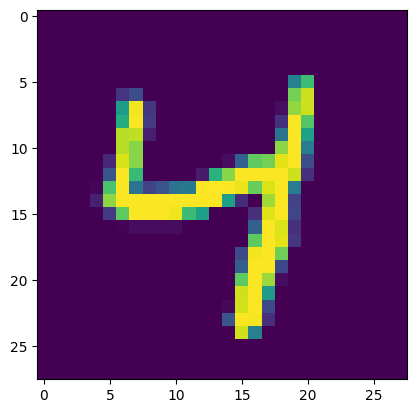

In [57]:
# Show the image
plt.imshow(test_data[1978][0].reshape(28,28))

In [58]:
# Pass the image thru our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 image

In [59]:
# Check the new prediction...get probabilities
new_prediction

tensor([[-2.1929e+01, -1.5314e+01, -2.0646e+01, -2.6675e+01, -1.7881e-06,
         -1.4946e+01, -1.4843e+01, -1.4446e+01, -1.9840e+01, -1.4760e+01]])

In [60]:
new_prediction.argmax()

tensor(4)

In [ ]:
# yes got the correct prediction, as 0,1,2,3,4,5,6,7,8,9 are the indeces as well as the labels.